# Yield Curve Steepeners

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Get Data

In [4]:
sys.path.append(r"/Users/diegoalvarez/Desktop/CashTreasuries/root/src")
from SyntheticSpreads import Spread

In [5]:
def get_position_attribute(col_end: str) -> pd.DataFrame:

    df_out = (Spread().get_spread()[
        ["Lweight", "Sweight", "L" + col_end, "S" + col_end, "spread"]].
        reset_index().
        melt(id_vars = ["date", "spread"]).
        assign(
            position = lambda x: x.variable.str[0],
            variable = lambda x: x.variable.str[1:]).
        pivot(index = ["date", "position", "spread"], columns = "variable", values = "value").
        assign(weighted_val = lambda x: x[col_end] * x.weight).
        reset_index()
        [["date", "position", "spread", "weighted_val"]].
        melt(id_vars = ["date", "position", "spread"]).
        drop(columns = ["variable"]).
        pivot(index = ["date", "spread"], columns = "position", values = "value").
        assign(spread_val = lambda x: x.L - x.S).
        reset_index().
        drop(columns = ["L", "S"]).
        assign(col_attribute = col_end))

    return df_out

For all specific attributes

In [7]:
df_rtn = get_position_attribute("bnd_rtn")
df_yld = get_position_attribute("yld")
df_dur = get_position_attribute("dur")
df_cvx = get_position_attribute("cvx")

For returns

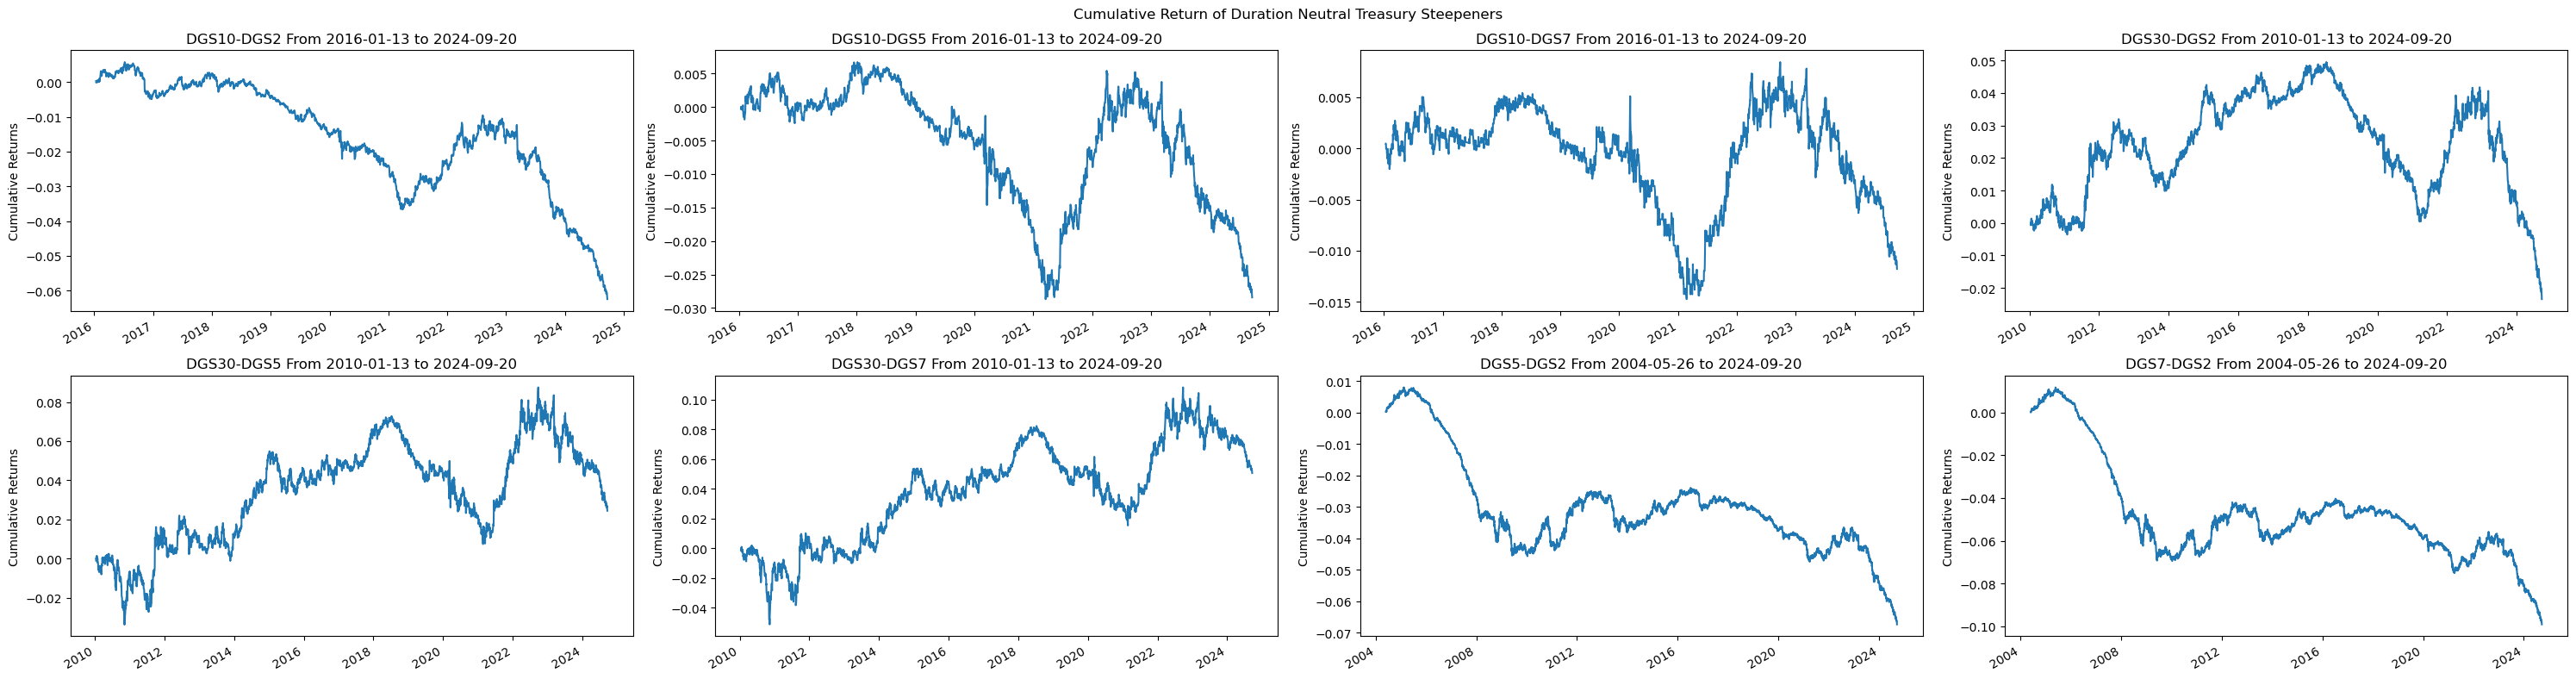

In [9]:
def plot_rtn(df_rtn: pd.DataFrame) -> plt.Figure: 

    variables = (df_rtn.spread.drop_duplicates().sort_values().to_list())
    fig, axes = plt.subplots(ncols = len(variables) // 2, nrows = len(variables) // 4, figsize = (30,8))
    
    for variable, ax in zip(variables, axes.flatten()):
    
        df_plot = (df_rtn.query(
            "spread == @variable").
            set_index("date")
            [["spread_val"]].
            cumsum())
        
        (df_plot.plot(
            ax     = ax,
            ylabel = "Cumulative Returns",
            xlabel = "",
            legend = False,
            title  = "{} From {} to {}".format(
                variable,
                df_plot.index.min().date(),
                df_plot.index.max().date())))
    
    fig.suptitle("Cumulative Return of Duration Neutral Treasury Steepeners")
    plt.tight_layout()
    
plot_rtn(df_rtn)

For the other attributes

In [11]:
def plot_attribute(df: pd.DataFrame) -> plt.Figure: 

    attribute = df.col_attribute.iloc[0]
    
    variables = (df.spread.drop_duplicates().sort_values().to_list())
    fig, axes = plt.subplots(ncols = len(variables) // 2, nrows = len(variables) // 4, figsize = (30,8))
    
    for variable, ax in zip(variables, axes.flatten()):
    
        df_plot = (df.query(
            "spread == @variable").
            set_index("date")
            [["spread_val"]])
        
        (df_plot.plot(
            ax     = ax,
            ylabel = attribute,
            xlabel = "",
            legend = False,
            title  = "{} From {} to {}".format(
                variable,
                df_plot.index.min().date(),
                df_plot.index.max().date())))
    
    fig.suptitle("{} of Duration Neutral Treasury Steepeners".format(attribute))
    plt.tight_layout()

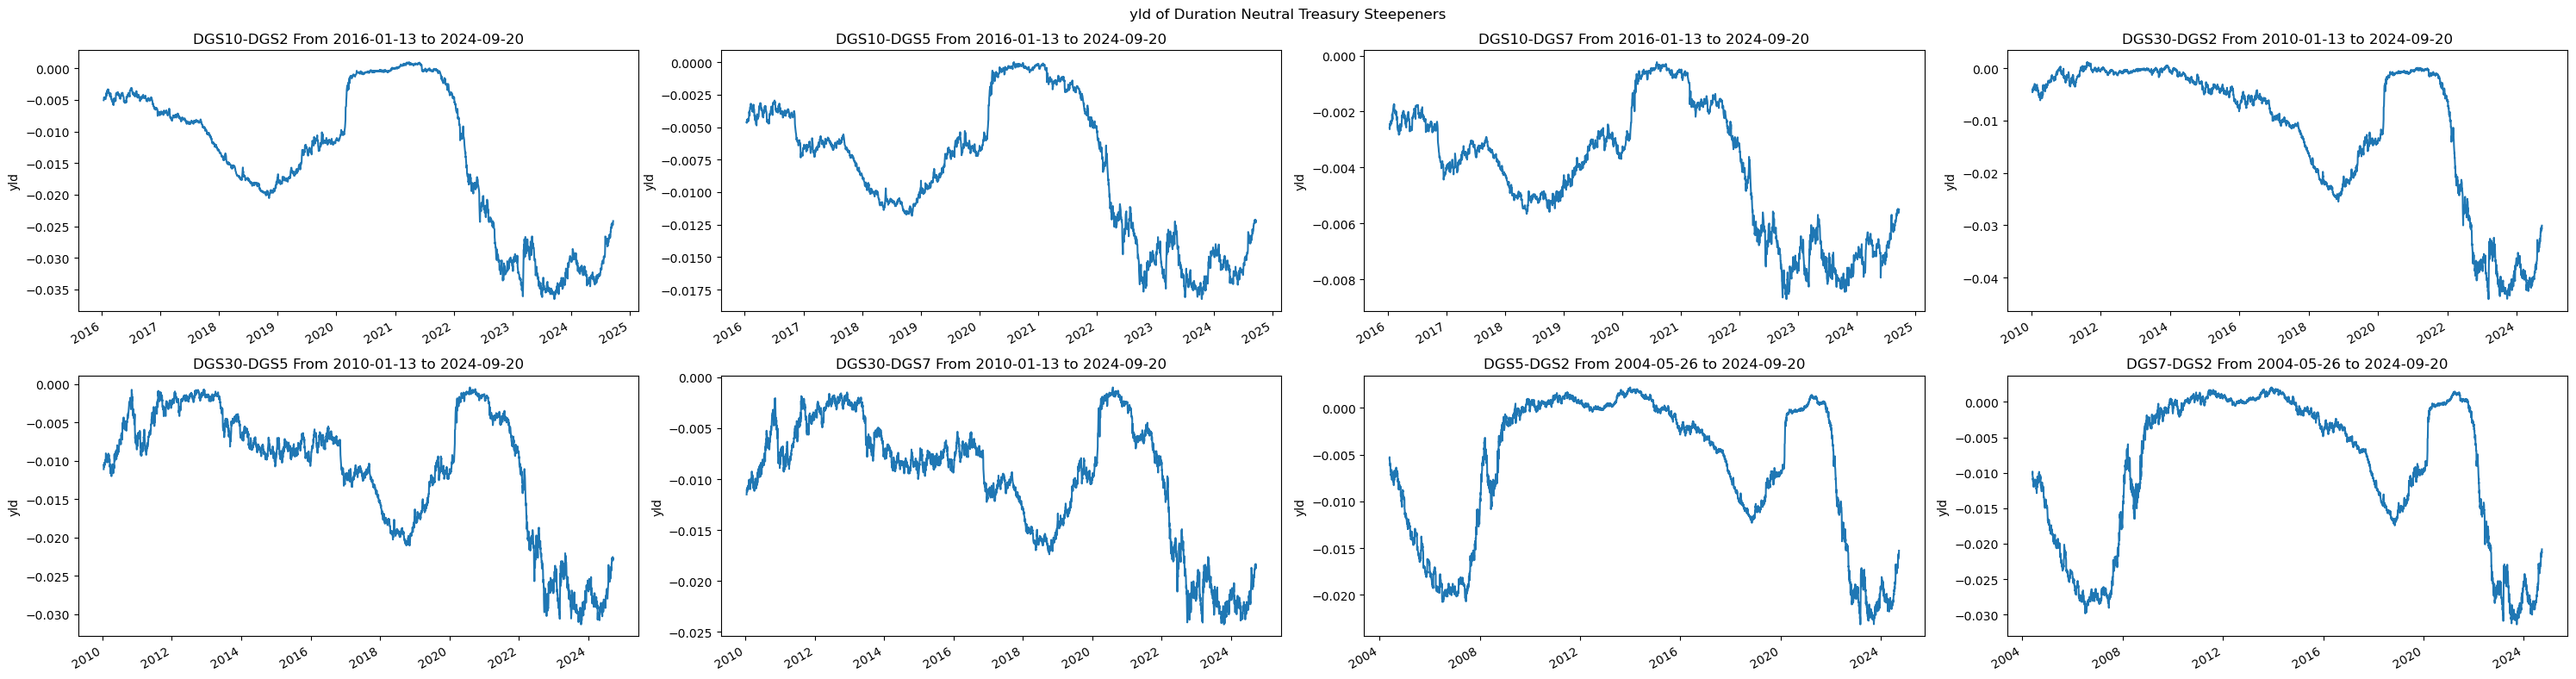

In [12]:
plot_attribute(df_yld)

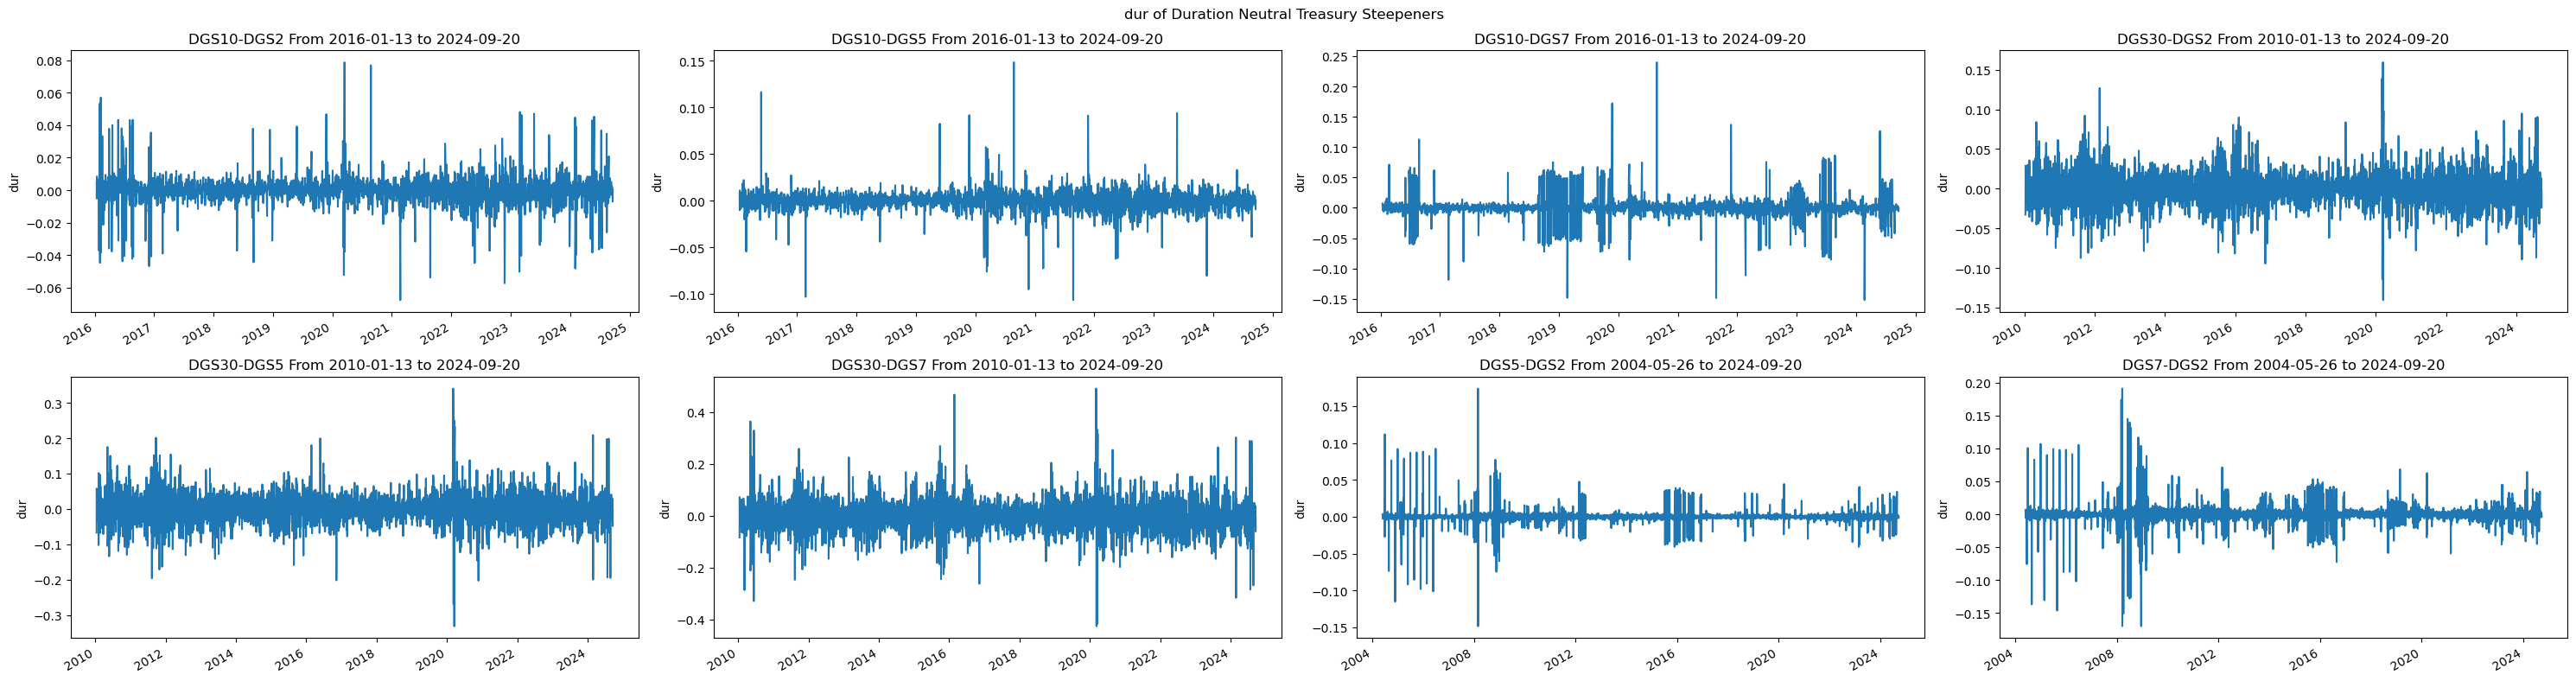

In [13]:
plot_attribute(df_dur)

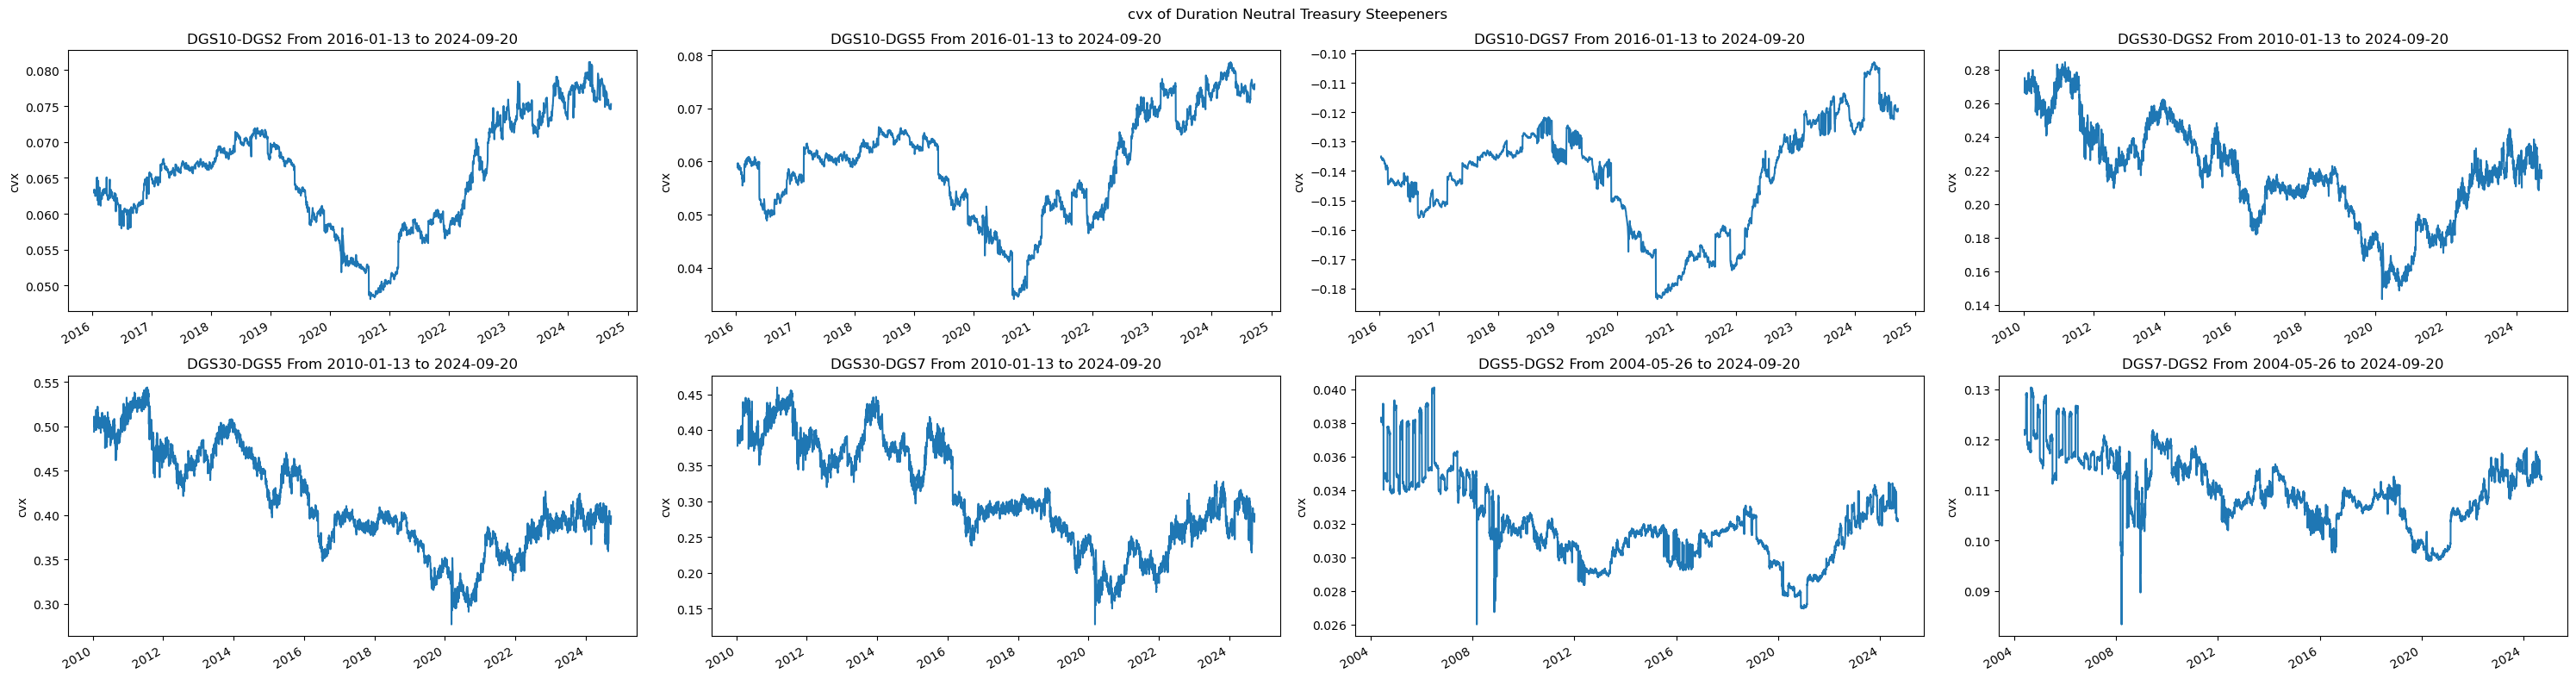

In [14]:
plot_attribute(df_cvx)